<a href="https://colab.research.google.com/github/Swanmoy/Machine_Learning_Models/blob/master/Messy_vs_CleanRoom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swanmoy121","key":"470db9a2c186e7bc1140749c97c55b01"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d cdawn1/messy-vs-clean-room

 89% 30.0M/33.6M [00:00<00:00, 33.1MB/s]
100% 33.6M/33.6M [00:00<00:00, 68.3MB/s]


In [7]:
from zipfile import ZipFile
file_name="messy-vs-clean-room.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [8]:
import os
clean_dir=os.path.join('images/train/clean')
messy_dir=os.path.join('images/train/messy')
print('total training clean room images:', len(os.listdir(clean_dir)))
print('total training messy room images:', len(os.listdir(messy_dir)))

clean_files = os.listdir(clean_dir)
print(clean_files[:10])

messy_files = os.listdir(messy_dir)
print(messy_files[:10])

total training clean room images: 96
total training messy room images: 96
['19.png', '93.png', '15.png', '73.png', '47.png', '80.png', '75.png', '17.png', '37.png', '95.png']
['19.png', '93.png', '15.png', '73.png', '47.png', '80.png', '75.png', '17.png', '37.png', '95.png']


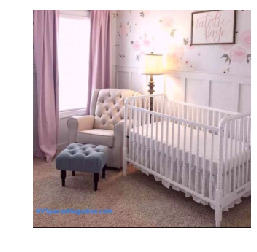

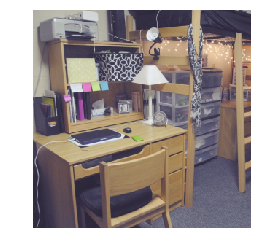

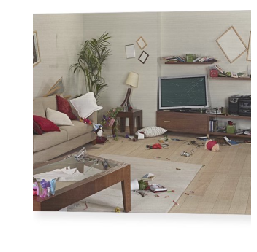

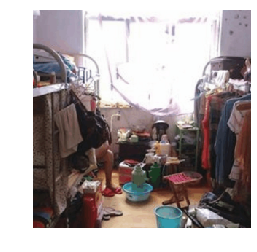

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_clean = [os.path.join(clean_dir, fname) 
                for fname in clean_files[pic_index-2:pic_index]]
next_messy = [os.path.join(messy_dir, fname) 
                for fname in messy_files[pic_index-2:pic_index]]
for i, img_path in enumerate(next_clean+next_messy):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [13]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "images/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "images/val/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='binary'
)

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=50, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 82944)             0         
_______________________________________

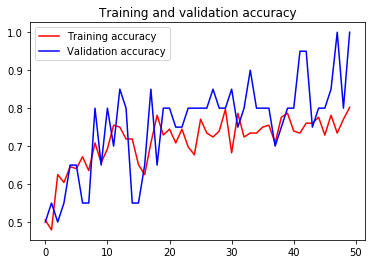

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a messy room")
  else:
    print(fn + " is a clean room")
 

Saving 3.png to 3 (1).png
[0.]
3.png is a clean room
